<a href="https://colab.research.google.com/github/hungry4therock/Colab/blob/main/5_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_CNN%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""
내용:텐서플로 CNN실습하기
"""
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.model_selection import train_test_split
from PIL import Image
tf.__version__


'2.5.0'

In [3]:
#데이터 로드
(cifar_train_data, cifar_train_label), (cifar_test_data, cifar_test_label) = load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
# 데이터 확인
print(cifar_train_data.shape)
print(cifar_test_data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
cifar_train_data[0:0]

array([], shape=(0, 32, 32, 3), dtype=uint8)

[43984 40624 39211 15700 34200 34584 20269 36387 31624]


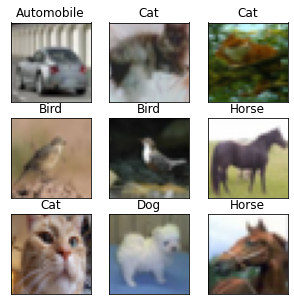

In [6]:
#데이터 샘플 이미지 확인
label_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
random_idx = np.random.randint(50000, size=9)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title(label_names[label])

In [7]:
# 모델학습을 위한 데이터 전처리(정규화)
cifar_train_data = cifar_train_data / 255
cifar_test_data = cifar_test_data / 255

# 데이터의 라벨을 범주형(one-hot encoding)으로 변환
cifar_train_label = to_categorical(cifar_train_label)
cifar_test_label = to_categorical(cifar_test_label)

In [8]:
#학습모델 구성
model = Sequential()

#CNN층
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2)) # 과대적합 문제 해결을 위한 Dropout 기법

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2)) # 과대적합 문제 해결을 위한 Dropout 기법

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2)) # 과대적합 문제 해결을 위한 Dropout 기법

#FCNN층
model.add(Flatten())  #입력층
model.add(Dense(256, activation='relu'))   #은닉층
model.add(Dense(10, activation='softmax')) #출력층

#모델확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [9]:
#학습모델 설정
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [10]:
#학습하기
model.fit(cifar_train_data, cifar_train_label, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 37s 13ms/step - loss: 1.6794 - acc: 0.3762
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 1.2227 - acc: 0.5584
Epoch 3/10
391/391 [==============================] - 5s 12ms/step - loss: 1.0043 - acc: 0.6420
Epoch 4/10
391/391 [==============================] - 5s 12ms/step - loss: 0.8618 - acc: 0.6955
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 0.7698 - acc: 0.7291
Epoch 6/10
391/391 [==============================] - 5s 12ms/step - loss: 0.6803 - acc: 0.7614
Epoch 7/10
391/391 [==============================] - 5s 12ms/step - loss: 0.6251 - acc: 0.7794
Epoch 8/10
391/391 [==============================] - 5s 12ms/step - loss: 0.5638 - acc: 0.8017
Epoch 9/10
391/391 [==============================] - 5s 13ms/step - loss: 0.5229 - acc: 0.8165
Epoch 10/10
391/391 [==============================] - 5s 13ms/step - loss: 0.4801 - acc: 0.8322


In [11]:
#평가하기
model.evaluate(cifar_test_data, cifar_test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.6410 - acc: 0.7836


[0.6409519910812378, 0.7835999727249146]

In [12]:
#모델저장
model.save('/content/drive/MyDrive/Colab Notebooks/file/cifar_model1.h5')